# Flights Data (연도별 월별 승객 데이터) 시각화 하기

<img src = "https://drive.google.com/uc?id=1o5XffUoAHHkd7PTEGA4cHUYQMH_SVFE_" height = 300 width = 600>

내가 항공사 오너 라고 생각하고, 연도별 월별 승객 데이터를 가지고 수요 분석을 해보자.

분석을 통해 얻을 수 있는 것은?

**1. 연도별 추세 파악**
  * 수요가 늘고 있다면, 늘어나는 수요에 대비
    - 예산, 기내식 주문량, 운영인력, 비행 스케쥴
  * 수요가 줄고 있다면, 감소 원인에 대해 분석 & 대비
     - 서비스 개선, 새로운 사업 계획

**2. 월별 추세 파악**
  * 월별 추세에 따라 수요에 대한 계획을 세울 수 있음


# 1.Python Libraries for Data Science

*   Numpy https://numpy.org/doc/stable/
*   pandas https://pandas.pydata.org/docs/
*   matplotlib https://matplotlib.org/stable/gallery/index.html
*   seaborn https://seaborn.pydata.org/examples/index.html





In [ ]:
# load library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Dataset

1. 구글 드라이브에 업로된 파일을 load 하기

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load data file
flights= pd.read_csv("/content/drive/MyDrive/data/flights.csv")

2. seaborn library 의 dataset 활용

In [ ]:
# load  datasest
flights = sns.load_dataset("flights")

# 3.Pandas Function for Data Exploration

In [ ]:
flights.head(5)  # data 앞부분

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights.tail(5) # data 뒷부분

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [ ]:
flights.shape # 행, 열 수

(144, 3)

In [ ]:
flights.info()  # 속성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flights.describe()  # 요약 통계량

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


# 4.Data Visualization

## 기본 plots

* line plot, bar plot, scatter plot, box plot

### Line Plot

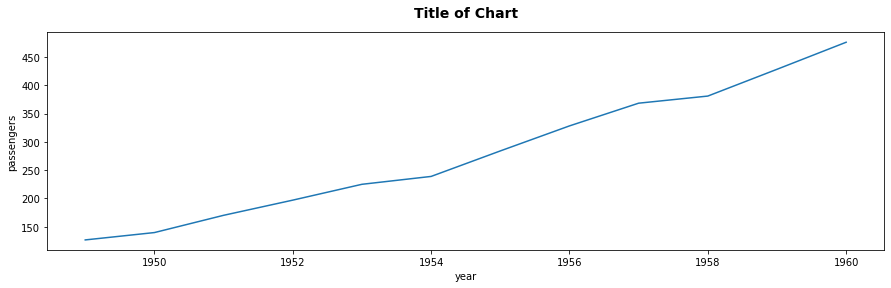

In [ ]:
# Line Plot

# 그래프 크기 설정
plt.figure(figsize=(15, 4))

# font style 지정
font_style = {
    'fontsize': 14,
    'fontweight': 'bold'      #  {‘normal’,‘bold’, 'heavy’,‘light’,‘ultrabold’,‘ultralight’} 설정 가능
}

# 그래프 제목
plt.title('Title of Chart', fontdict=font_style, loc='center', pad=15)

# Line Plot 그리기
sns.lineplot(data=flights, x="year", y="passengers", ci=None)

---

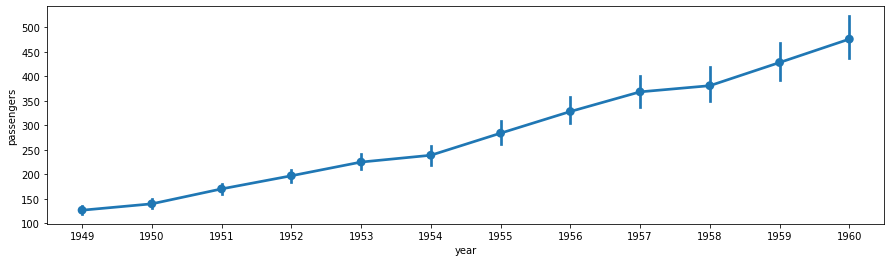

In [ ]:
# Point Plot
# 중간점: 각 연도별 승객수의 평균, 수직선: 표준편차

# 그래프 크기 설정
plt.figure(figsize=(15, 4))

# Point Plot 그리기
sns.pointplot(data=flights, x="year", y="passengers", errorbar="sd")

⬛  위의 Point Plot을 보고 파악할 수 있는 것은?



In [ ]:
#@title
# Point Plot을 통해 연도별 승객수의 평균값과 분포를 확인할 수 있다.
# 중간점이 각 연도별 승객수의 평균을 가리키고, 수직선은 각 분포를 표현하는 그래프이다.
# 승객수는 점점 증가하고, 분포도 점점 커진다는 것을 알 수 있다.

---

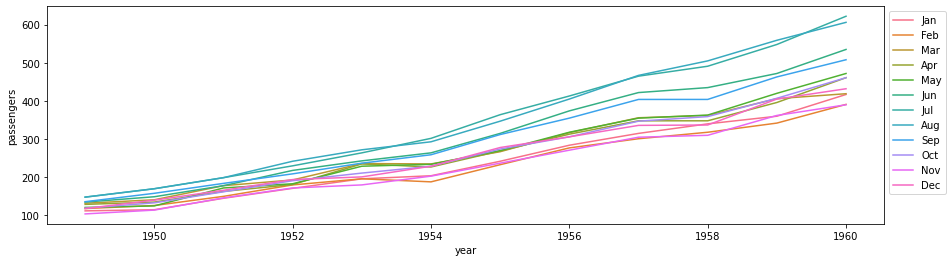

In [ ]:
# line plot 에서 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기

# 그래프 크기 설정
plt.figure(figsize=(15, 4))

# line plot 에서 month 값에 따라 여러 색으로 나눠 그리기
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

# legend 표시
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
# line plot - year 값에 따라 여러 색으로 나눠 그리기
# 여기에 아래 그래프를 출력하는 code를 쓰세요.


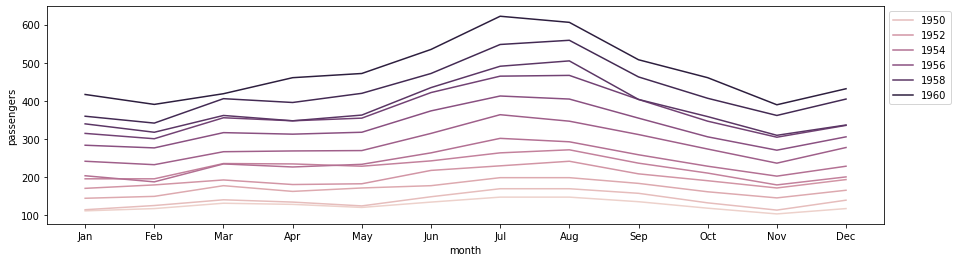

In [ ]:
#@title

plt.figure(figsize=(15, 4))
sns.lineplot(data=flights, x="month", y="passengers", hue="year")
plt.legend(bbox_to_anchor=(1,1))

* relplot : kind="line" 으로 하면 line plot을 그려준다
  > relplot (kind: 'scatter'; default or 'line')
* seaborn > Tutorial > Overview of seaborn plotting functions
  > https://seaborn.pydata.org/tutorial/function_overview.html
* seaborn > API > seaborn.relplot
  > https://seaborn.pydata.org/generated/seaborn.relplot.html

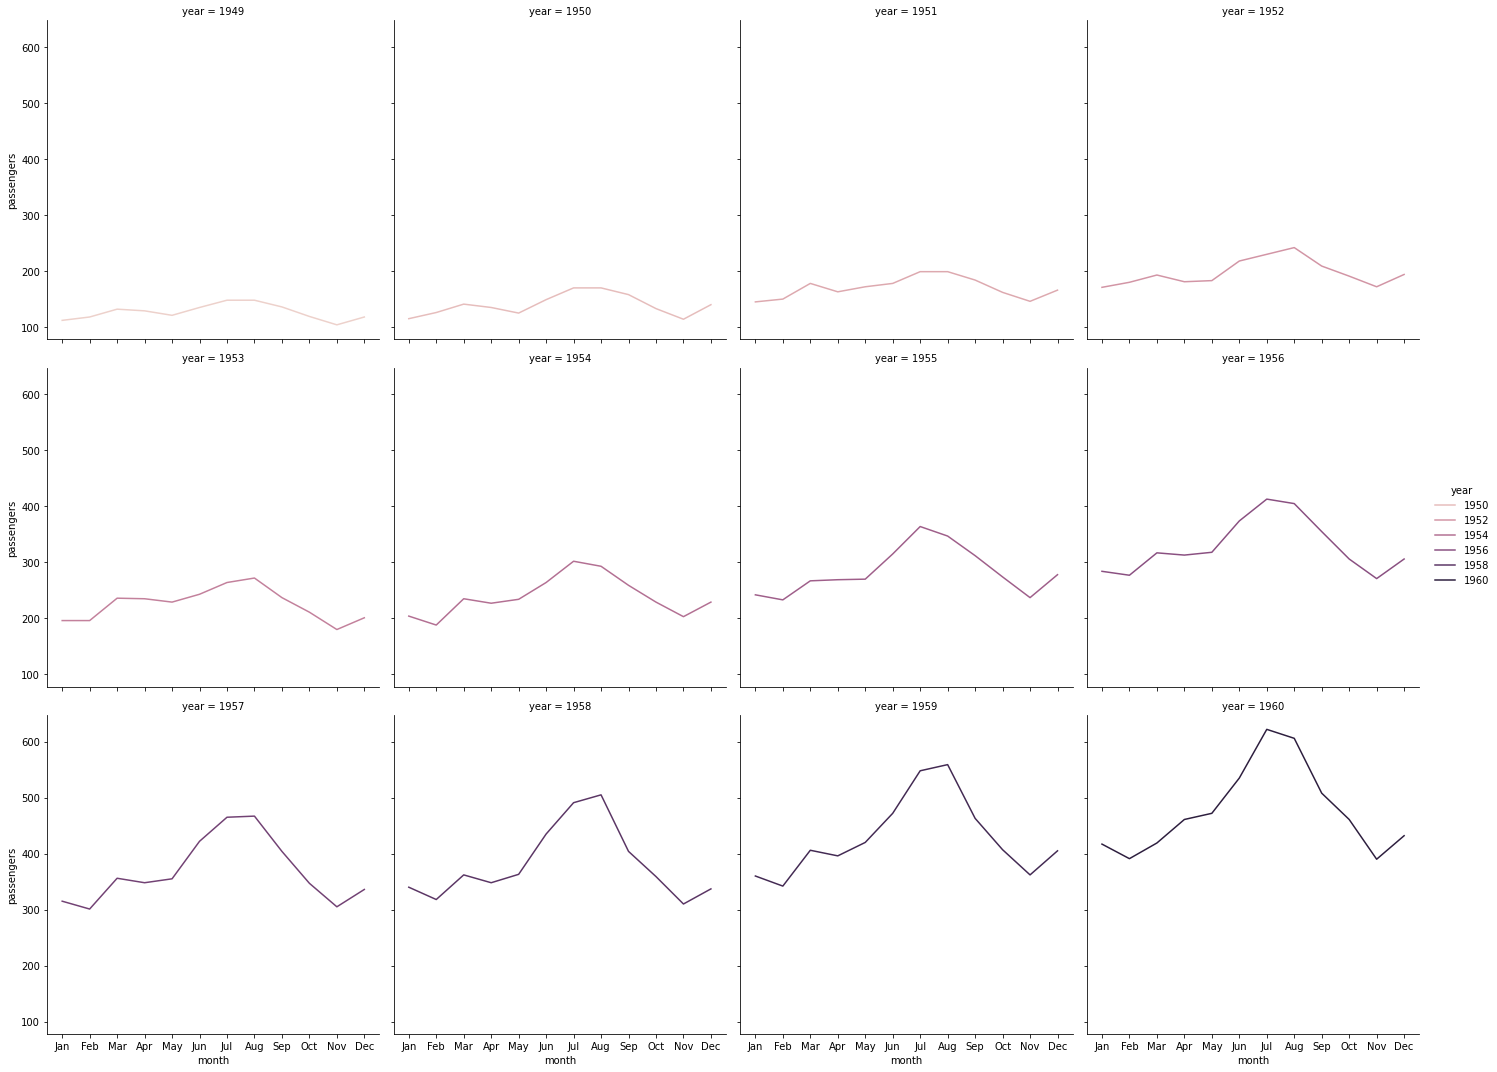

In [ ]:
# relplot - line plot을 여러개의 sub plot으로 나눠 그릴 수 있다
sns.relplot(data=flights, x="month", y="passengers", kind="line", hue="year", col="year", col_wrap=4)

### Bar Plot

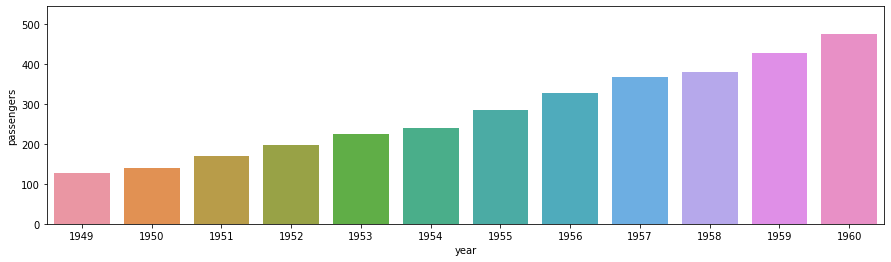

In [ ]:
# Bar Plot
# 막대의 높이: 연도별 평균 승객수

plt.figure(figsize=(15, 4))
sns.barplot(data=flights, x="year", y="passengers" , errwidth=0)

In [ ]:
# Bar Plot - 막대의 높이: 월별 평균 승객수
# 여기에 아래 그래프를 출력하는 code를 쓰세요


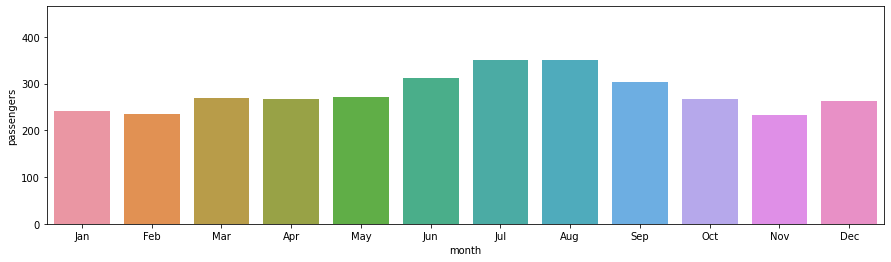

In [ ]:
#@title
# Bar Plot
plt.figure(figsize=(15, 4))
sns.barplot(data=flights, x="month", y="passengers" , errwidth=0)

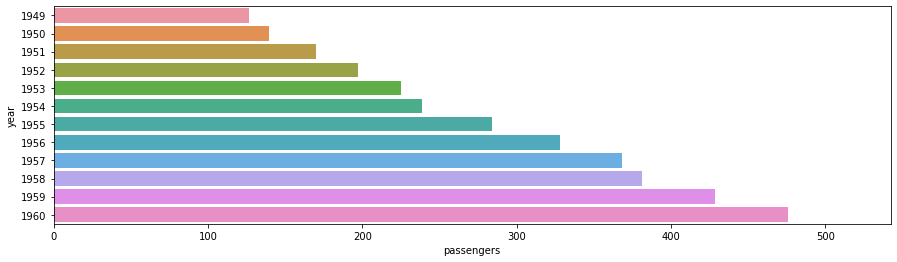

In [ ]:
# Horizontal bar plot
# 막대의 높이는 연도별 평균 승객수

plt.figure(figsize=(15, 4))
sns.barplot(data=flights, y="year", x="passengers" , errwidth=0, orient='h')

### Scatter Plot

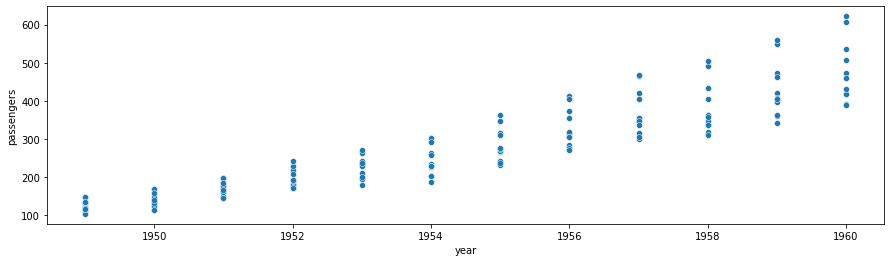

In [ ]:
# Scatter Plot

plt.figure(figsize=(15, 4))
sns.scatterplot(data=flights, x="year", y="passengers" )

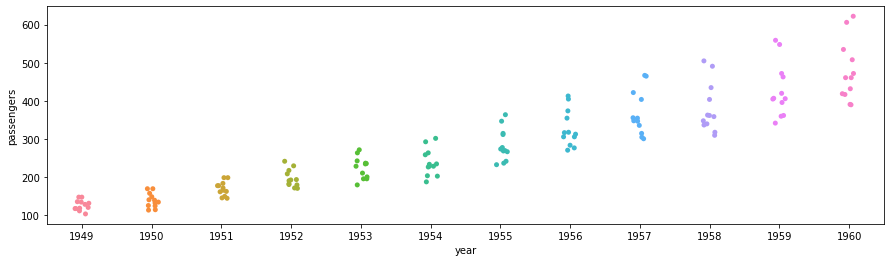

In [ ]:
# Strip Plot - scatter plot의  한 종류. 각 data 별로 다른 색 적용하여 category로 나뉘어 보기 좋다

plt.figure(figsize=(15, 4))
sns.stripplot(data=flights, x="year", y="passengers" )

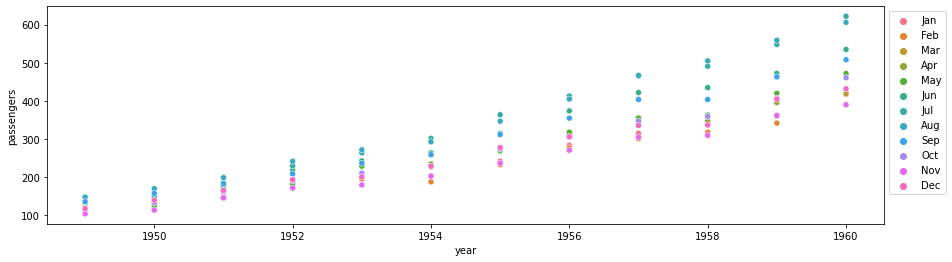

In [ ]:
# Scatter Plot -  월별로 세분화

plt.figure(figsize=(15, 4))
sns.scatterplot(data=flights, x="year", y="passengers", hue="month")
plt.legend(bbox_to_anchor=(1,1))

### Box Plot

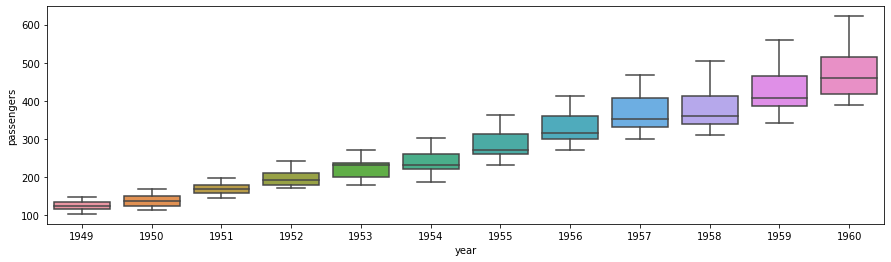

In [ ]:
# Box Plot - 연도별

plt.figure(figsize=(15, 4))
sns.boxplot(data=flights, x="year", y="passengers")

In [ ]:
# Box Plot - 월별
# 여기에 아래 그래프를 출력하는 code를 쓰세요

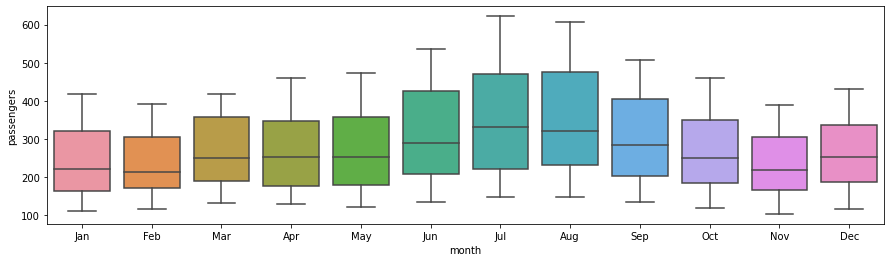

In [ ]:
#@title
# Box Plot -  월별

plt.figure(figsize=(15, 4))
sns.boxplot(data=flights, x="month", y="passengers")

## 그 외 plots

### Heatmap

In [ ]:
# pivot으로 데이터 형태 바꾸기
flights_h = flights.pivot("month", "year", "passengers")
flights_h

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


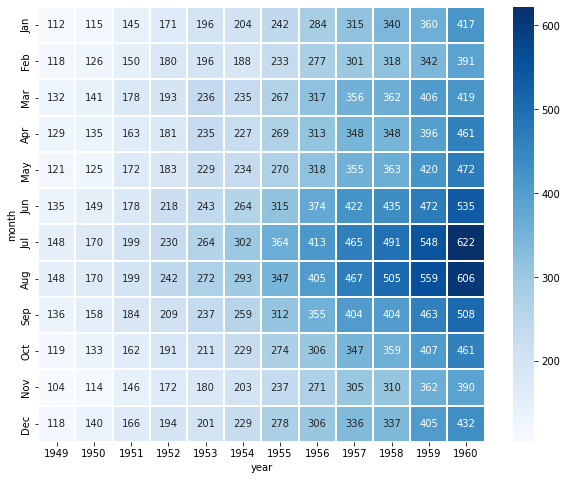

In [ ]:
# Heatmap
# 데이터 형태가 테이블 형태 일때보다 heatmap으로 나타내면 언제 승객이 많고 승객수 변화가 어떻게 되는지 파악이 용이

plt.figure(figsize=(10, 8))
sns.heatmap(flights_h, annot=True, fmt="d", linewidths=1 , cmap="Blues")

### Hist Plot

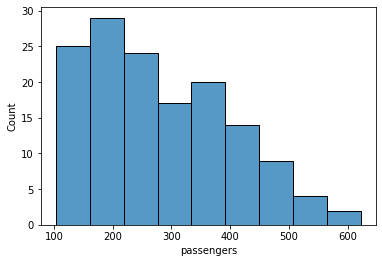

In [ ]:
# Hist Plot
sns.histplot(data=flights, x= "passengers")

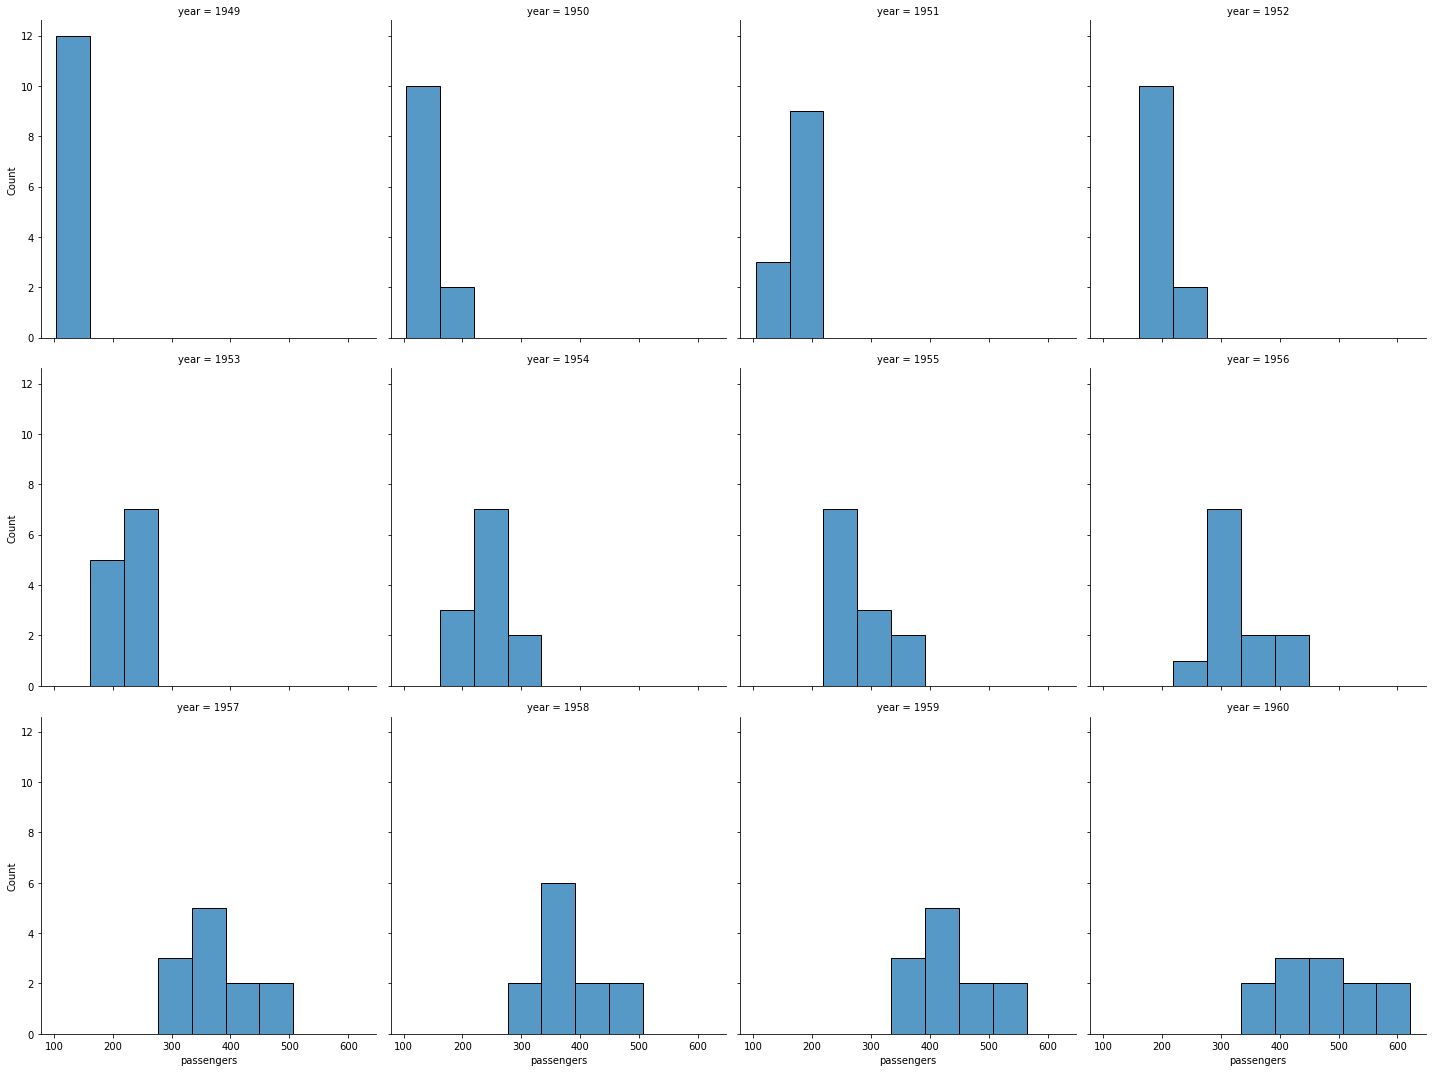

In [ ]:
# Hist Plot - 연도별 세분화하여 sub plot 으로 구성
sns.displot(data=flights, x='passengers',bins=9 , col= 'year', col_wrap=4)

### Kde Plot

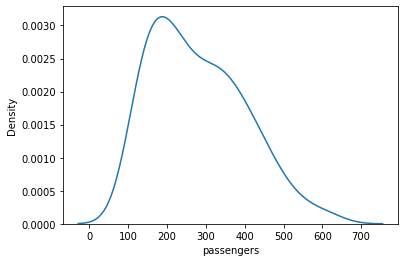

In [ ]:
# Kde Plot (확률밀도함수 그래프)
# density plot

sns.kdeplot(data=flights, x= "passengers")

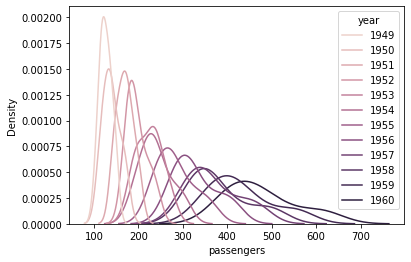

In [ ]:
# Kde Plot - 연도별 세분화

sns.kdeplot(data=flights, x= flights["passengers"], hue='year')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


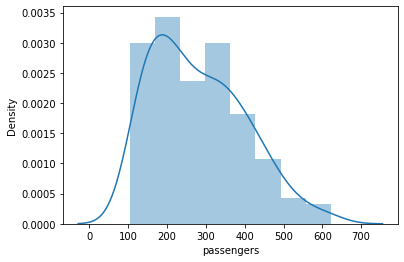

In [ ]:
#  Dist Plot  =  hist plot + kde plot
sns.distplot(flights["passengers"])